# Домашнее задание №1

В этом домашнем задании вам предлагается обучить модель регрессии для предсказания стоимости автомобилей, а также реализовать веб-сервис для применения построенной модели на новых данных.

> Оценка за домашку = min(ваш балл, 10)


Задания, <font color='#9933CC'>выделенные фиолетовым</font>, требуют от вас написания кода.

А вопросы, <font color='#FF6600'>выделенные оранжевым</font>, текстового ответа.

Оцениваются как код, так и ответы на вопросы. Если нет одного и/или другого, то часть баллов за соответствующее задание без колебаний снимается.

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
import seaborn as sns

random.seed(42)
np.random.seed(42)

Ниже ответьте на вопрос <font color='#FF6600'>
"Для чего фиксируем сиды в домашках?"</font>

In [7]:
print("Для того чтобы обеспечить повторяемость генерации случайных чисел")

Для того чтобы обеспечить повторяемость генерации случайных чисел


# Часть 1 (2.5 балла + 0.75) | EDA

## Простейший EDA и обработка признаков (1.5 балла + 0.25)

In [8]:
df_train = pd.read_csv('https://raw.githubusercontent.com/hse-mlds/ml/main/hometasks/HT1/cars_train.csv')
df_test = pd.read_csv('https://raw.githubusercontent.com/hse-mlds/ml/main/hometasks/HT1/cars_test.csv')

print("Train data shape:", df_train.shape)
print("Test data shape: ", df_test.shape)

Train data shape: (6999, 13)
Test data shape:  (1000, 13)


(0.15 балла) <font color='#9933CC'>Отобразите 10 **случайных** строк тренировочного датасета</font>

In [9]:
# your code here

df_train.sample(n=10)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
6565,Renault KWID Climber 1.0 MT BSIV,2019,300000,35000,Petrol,Individual,Manual,First Owner,23.01 kmpl,999 CC,67 bhp,91Nm@ 4250rpm,5.0
2943,Maruti Wagon R LXI,2013,225000,58343,Petrol,Trustmark Dealer,Manual,First Owner,21.79 kmpl,998 CC,67.05 bhp,90Nm@ 3500rpm,5.0
2024,Hyundai i20 Asta 1.2,2013,360000,30000,Petrol,Individual,Manual,First Owner,18.5 kmpl,1197 CC,82.85 bhp,113.7Nm@ 4000rpm,5.0
263,Hyundai i20 1.2 Asta,2010,300000,70000,Petrol,Individual,Manual,First Owner,17.0 kmpl,1197 CC,80 bhp,"11.4 kgm at 4,000 rpm",5.0
4586,Skoda Octavia L and K 1.9 TDI MT,2005,250000,120000,Diesel,Individual,Manual,Third Owner,16.4 kmpl,1896 CC,90 bhp,"21.4@ 1,900(kgm@ rpm)",5.0
4479,Maruti Ciaz ZXi,2016,700000,20000,Petrol,Individual,Manual,First Owner,20.73 kmpl,1373 CC,91.1 bhp,130Nm@ 4000rpm,5.0
4881,Hyundai Grand i10 1.2 Kappa Magna BSIV,2017,445000,27000,Petrol,Individual,Manual,First Owner,18.9 kmpl,1197 CC,81.86 bhp,113.75nm@ 4000rpm,5.0
3583,Ford Ecosport 1.5 DV5 MT Trend,2016,515000,68609,Diesel,Dealer,Manual,First Owner,22.7 kmpl,1498 CC,89.84 bhp,204Nm@ 2000-2750rpm,5.0
6361,Hyundai Verna 1.4 VTVT,2014,500000,33400,Petrol,Individual,Manual,First Owner,17.43 kmpl,1396 CC,105.5 bhp,135.3Nm@ 5000rpm,5.0
4108,Hyundai i20 Era 1.2,2015,490000,45900,Petrol,Individual,Manual,Second Owner,18.6 kmpl,1197 CC,81.83 bhp,114.7Nm@ 4000rpm,5.0


(0.1 балла) <font color='#9933CC'>Отобразите первые 5 и последние 5 объектов тестового датасета</font>

In [10]:
# your code here
df_test.head(5)
df_test.tail(5)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
995,Hyundai i10 Magna 1.1L,2008,250000,100000,Petrol,Individual,Manual,Second Owner,19.81 kmpl,1086 CC,68.05 bhp,99.04Nm@ 4500rpm,5.0
996,Hyundai i20 2015-2017 Sportz 1.2,2017,440000,50000,Petrol,Individual,Manual,Second Owner,18.6 kmpl,1197 CC,81.83 bhp,114.7Nm@ 4000rpm,5.0
997,Hyundai i20 Era Diesel,2009,340000,40000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
998,Hyundai i10 Asta,2012,350000,25000,Petrol,Individual,Manual,First Owner,20.36 kmpl,1197 CC,78.9 bhp,111.8Nm@ 4000rpm,5.0
999,Honda City i DTec SV,2016,700000,110000,Diesel,Individual,Manual,First Owner,26.0 kmpl,1498 CC,98.6 bhp,200Nm@ 1750rpm,5.0


(0.1 балла) <font color='#9933CC'>Посчитайте основные статистики как по числовым, так и по категориальным столбцам для трейна и теста</font>. 
> Подсказка: ``.describe()`` с нужным(и) аргументом(-ами)



In [11]:
# your code here
df_train.describe(include='all')
df_test.describe(include='all')
# df_test.info()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
count,1000,1000.000000,1.000000e+03,1000.000000,1000,1000,1000,1000,981,981,981,981,981.000000
unique,621,NaN,NaN,NaN,4,3,2,5,237,88,182,226,NaN
top,Maruti Alto 800 LXI,NaN,NaN,NaN,Diesel,Individual,Manual,First Owner,18.6 kmpl,1248 CC,74 bhp,200Nm@ 1750rpm,NaN
freq,15,NaN,NaN,NaN,534,837,877,623,23,116,43,57,NaN
mean,NaN,2013.681000,6.179010e+05,71393.341000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.410805
std,NaN,4.012149,7.585539e+05,48486.218662,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.919985
min,NaN,1995.000000,3.100000e+04,1303.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.000000
25%,NaN,2011.000000,2.500000e+05,37000.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.000000
50%,NaN,2014.000000,4.349990e+05,61500.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.000000
75%,NaN,2017.000000,6.700000e+05,100000.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.000000


(0.15 балла) <font color='#9933CC'>Посмотрите, есть ли в датасете пропуски.</font>

<font color='#FF6600'>Если есть, то в каких колонках?</font>

In [12]:
# your code here
df_test.info()
df_train.info()
print('Пропуски есть в колонках mileage, engine, max_power, torque, seats в df_train')
print('Пропуски есть в колонках mileage, engine, max_power, torque, seats в df_test')


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           1000 non-null   object 
 1   year           1000 non-null   int64  
 2   selling_price  1000 non-null   int64  
 3   km_driven      1000 non-null   int64  
 4   fuel           1000 non-null   object 
 5   seller_type    1000 non-null   object 
 6   transmission   1000 non-null   object 
 7   owner          1000 non-null   object 
 8   mileage        981 non-null    object 
 9   engine         981 non-null    object 
 10  max_power      981 non-null    object 
 11  torque         981 non-null    object 
 12  seats          981 non-null    float64
dtypes: float64(1), int64(3), object(9)
memory usage: 101.7+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6999 entries, 0 to 6998
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------        

(0.1 балла) <font color='#9933CC'>Посмотрите, есть ли в трейне объекты с одинаковым признаковым описанием</font> (целевую переменную следует исключить). Если есть, то сколько?

In [13]:
# your code here

len(df_train[df_train.duplicated()==True])

985

(0.15 балла) <font color='#9933CC'>Отобразите такие объекты</font>

In [14]:
# your code here
df_train[df_train.duplicated()==True]

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
254,Hyundai Grand i10 Sportz,2017,450000,35000,Petrol,Individual,Manual,First Owner,18.9 kmpl,1197 CC,82 bhp,114Nm@ 4000rpm,5.0
258,Maruti Swift VXI,2012,330000,50000,Petrol,Individual,Manual,Second Owner,18.6 kmpl,1197 CC,85.8 bhp,114Nm@ 4000rpm,5.0
324,Jaguar XE 2016-2019 2.0L Diesel Prestige,2017,2625000,9000,Diesel,Dealer,Automatic,First Owner,13.6 kmpl,1999 CC,177 bhp,430Nm@ 1750-2500rpm,5.0
325,Lexus ES 300h,2019,5150000,20000,Petrol,Dealer,Automatic,First Owner,22.37 kmpl,2487 CC,214.56 bhp,202Nm@ 3600-5200rpm,5.0
326,Jaguar XF 2.0 Diesel Portfolio,2017,3200000,45000,Diesel,Dealer,Automatic,First Owner,19.33 kmpl,1999 CC,177 bhp,430Nm@ 1750-2500rpm,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6880,Renault Captur 1.5 Diesel RXT,2018,1265000,12000,Diesel,Individual,Manual,First Owner,20.37 kmpl,1461 CC,108.45 bhp,240Nm@ 1750rpm,5.0
6881,Maruti Ciaz Alpha Diesel,2019,1025000,32000,Diesel,Individual,Manual,First Owner,28.09 kmpl,1248 CC,88.50 bhp,200Nm@ 1750rpm,5.0
6989,Maruti Swift Dzire VDI,2015,625000,50000,Diesel,Individual,Manual,First Owner,26.59 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
6997,Tata Indigo CR4,2013,290000,25000,Diesel,Individual,Manual,First Owner,23.57 kmpl,1396 CC,70 bhp,140Nm@ 1800-3000rpm,5.0


(0.15 балла) <font color='#9933CC'>Удалите повторяющиеся строки</font>. Если при одинаковом признаковом описании цены на автомобили отличаются, то оставьте первую строку по этому автомобилю

In [15]:
# your code here
col_duplicate = ['name','year',
                         'km_driven','fuel',
                         'seller_type','transmission',
                         'owner','mileage','engine',
                         'max_power', 'torque', 'seats']

df_train_new = df_train.drop_duplicates(subset = col_duplicate, keep='first')

df_train_new.shape

(5840, 13)

In [16]:
df_train_new

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
3,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0
4,Hyundai Xcent 1.2 VTVT E Plus,2017,440000,45000,Petrol,Individual,Manual,First Owner,20.14 kmpl,1197 CC,81.86 bhp,113.75nm@ 4000rpm,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6992,Hyundai Santro Xing GLS,2008,120000,191000,Petrol,Individual,Manual,First Owner,17.92 kmpl,1086 CC,62.1 bhp,96.1Nm@ 3000rpm,5.0
6993,Maruti Wagon R VXI BS IV with ABS,2013,260000,50000,Petrol,Individual,Manual,Second Owner,18.9 kmpl,998 CC,67.1 bhp,90Nm@ 3500rpm,5.0
6994,Hyundai i20 Magna,2013,320000,110000,Petrol,Individual,Manual,First Owner,18.5 kmpl,1197 CC,82.85 bhp,113.7Nm@ 4000rpm,5.0
6995,Hyundai Verna CRDi SX,2007,135000,119000,Diesel,Individual,Manual,Fourth & Above Owner,16.8 kmpl,1493 CC,110 bhp,"24@ 1,900-2,750(kgm@ rpm)",5.0


In [17]:


print(df_train_new.shape == (5840, 13))

True


(0.1 балла) Чтоб все было по красоте, <font color='#9933CC'>обновите индексы строк таким образом, чтобы они шли от 0 без пропусков</font>

In [18]:
# your code here 
df_train_new = df_train_new.reset_index()

In [19]:
df_train_new = df_train_new.reset_index()

In [20]:
df_train_new = df_train_new.drop('level_0', axis=1)

In [21]:
df_train_new = df_train_new.drop('index', axis=1)

Вы могли заметить, что с признаками ``mileage, engine, max_power и torque`` всё не слава богу. Давайте починим.

(0.25 балла) Задача такая: 
<font color='#9933CC'>
* убрать единицы измерения для признаков ``mileage, engine, max_power``. 
* кастануть эти столбцы столбцы к ``float``.
* удалить столбец ``torque``
</font>

> Все действия нужно производить над обоими датасетами

---
**Доп (0.25 балла):**
* <font color='#9933CC'>Вместо удаления признак `torque` разделите на два: собственно `torque` и `max_torque_rpm`.</font> Учтите единицы измерения. Они разные ☹

In [22]:
# убираем единицы измерения
# df_train

df_train_new['mileage']= df_train_new['mileage'].str.replace('kmpl','')
df_train_new['mileage']= df_train_new['mileage'].str.replace('km/kg','')
df_train_new['engine']= df_train_new['engine'].str.replace('CC','')
df_train_new['max_power']= df_train_new['max_power'].str.replace('bhp','')

# df_test

df_test['mileage']= df_test['mileage'].str.replace('km/kg','')
df_test['mileage']= df_test['mileage'].str.replace('kmpl','')
df_test['engine']= df_test['engine'].str.replace('CC','')
df_test['max_power']= df_test['max_power'].str.replace('bhp','')


In [23]:
# меняем типы столбцов

# для трейна

df_train_new['mileage'] = df_train_new['mileage'].astype(float)
df_train_new.max_power = df_train_new.max_power.astype(str) 
df_train_new.max_power= df_train_new.max_power.str.replace(r'[^0-9.]+','',regex=True)
df_train_new['max_power'] = pd.to_numeric(df_train_new['max_power'], errors='coerce')
df_train_new['max_power'] = df_train_new['max_power'].astype(float)
df_train_new['engine'] = df_train_new['engine'].astype(float)

# для теста

df_test['mileage'] = df_test['mileage'].astype(float)
df_test.max_power = df_test.max_power.astype(str) 
df_test.max_power= df_test.max_power.str.replace(r'[^0-9.]+','',regex=True)
df_test.max_power = pd.to_numeric(df_test.max_power, errors='coerce')
df_train['max_power'] = df_test['max_power'].astype(float)
df_test['engine'] = df_test['engine'].astype(float)
# df_test.dtypes
# df_train.dtypes

In [24]:
# удаление столбца torque
df_train_new = df_train_new.drop('torque',axis = 1)
df_test = df_test.drop('torque',axis = 1)


(0.15 балла) <font color='#9933CC'>Заполните пропуски в столбцах медианами. Убедитесь, что после заполнения пропусков не осталось</font>

> Обратите внимание, что, по уму, нужно посчитать медиану по трейну и этим средним заполнять пропуски в тесте. Так же делаем, если, например, стандартизируем признаки.



In [25]:
# your code here
miss_value= df_train_new.isnull().sum()
miss_value_t = df_test.isnull().sum()

med_mileage = df_train_new.mileage.median()
med_engine = df_train_new.engine.median()
med_max_power = df_train_new.max_power.median() 
med_seats = df_train_new.seats.median()
# заполнение пропусков в трейн и тест 
df_train_new.mileage = df_train_new.mileage.fillna(med_mileage)
df_train_new.engine = df_train_new.engine.fillna(med_engine)
df_train_new.max_power = df_train_new.max_power.fillna(med_max_power)
df_train_new.seats = df_train_new.seats.fillna(med_seats)

df_test.mileage = df_test.mileage.fillna(med_mileage)
df_test.engine = df_test.engine.fillna(med_engine)
df_test.max_power = df_test.max_power.fillna(med_max_power)
df_test.seats = df_test.seats.fillna(med_seats)




(0.1 балла) Теперь, когда не осталось пропусков, можно <font color='#9933CC'>преобразовать столбцы к более подходящим типам (``engnine`` и ``seats`` к int)
</font>

Ниже ответьте, <font color='#FF6600'>почему (хоть мы этого и не делаем) ``seats``, возможно, лучше сделать переменной категориальной, а не целочисленной.</font>

In [26]:
print("потому что у нас в машиннах есть только определенное кол-во сидений и не будет такого, что в машине может быть 100 сидений ")

потому что у нас в машиннах есть только определенное кол-во сидений и не будет такого, что в машине может быть 100 сидений 


In [27]:
# your code here
df_train_new['engine'] = df_train_new['engine'].astype(int)
df_train_new.seats = df_train_new.seats.astype(int) 
df_train_new['km_driven'] = df_train_new['km_driven'].astype(int)

df_test['engine'] = df_test['engine'].astype(int)
df_test.seats = df_test.seats.astype(int) 
df_test['km_driven'] = df_test['km_driven'].astype(int)
df_train_new_1 = df_train_new.copy()

## Визуализации (1 балл + 0.5)

Визуализировать нам надо не так уж и много. Во-первых, хотелось бы, в принципе, увидеть как распределены значения признаков. Также хотелось бы понять, насколько признаки скоррелированы между собой и с целевой переменной. А ещё неплохо бы посмотреть, не оказалось ли так, что тестовые данные распределены иначе, чем трейн.

Этим всем и предлагаем вам заняться.

(0.25 балла) <font color='#9933CC'>Посторойте попарные распределения всех числовых признаков для трейна.</font>

> ``sns.pairplot()`` позволяет сделать это в одну строчку

D:\anac\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


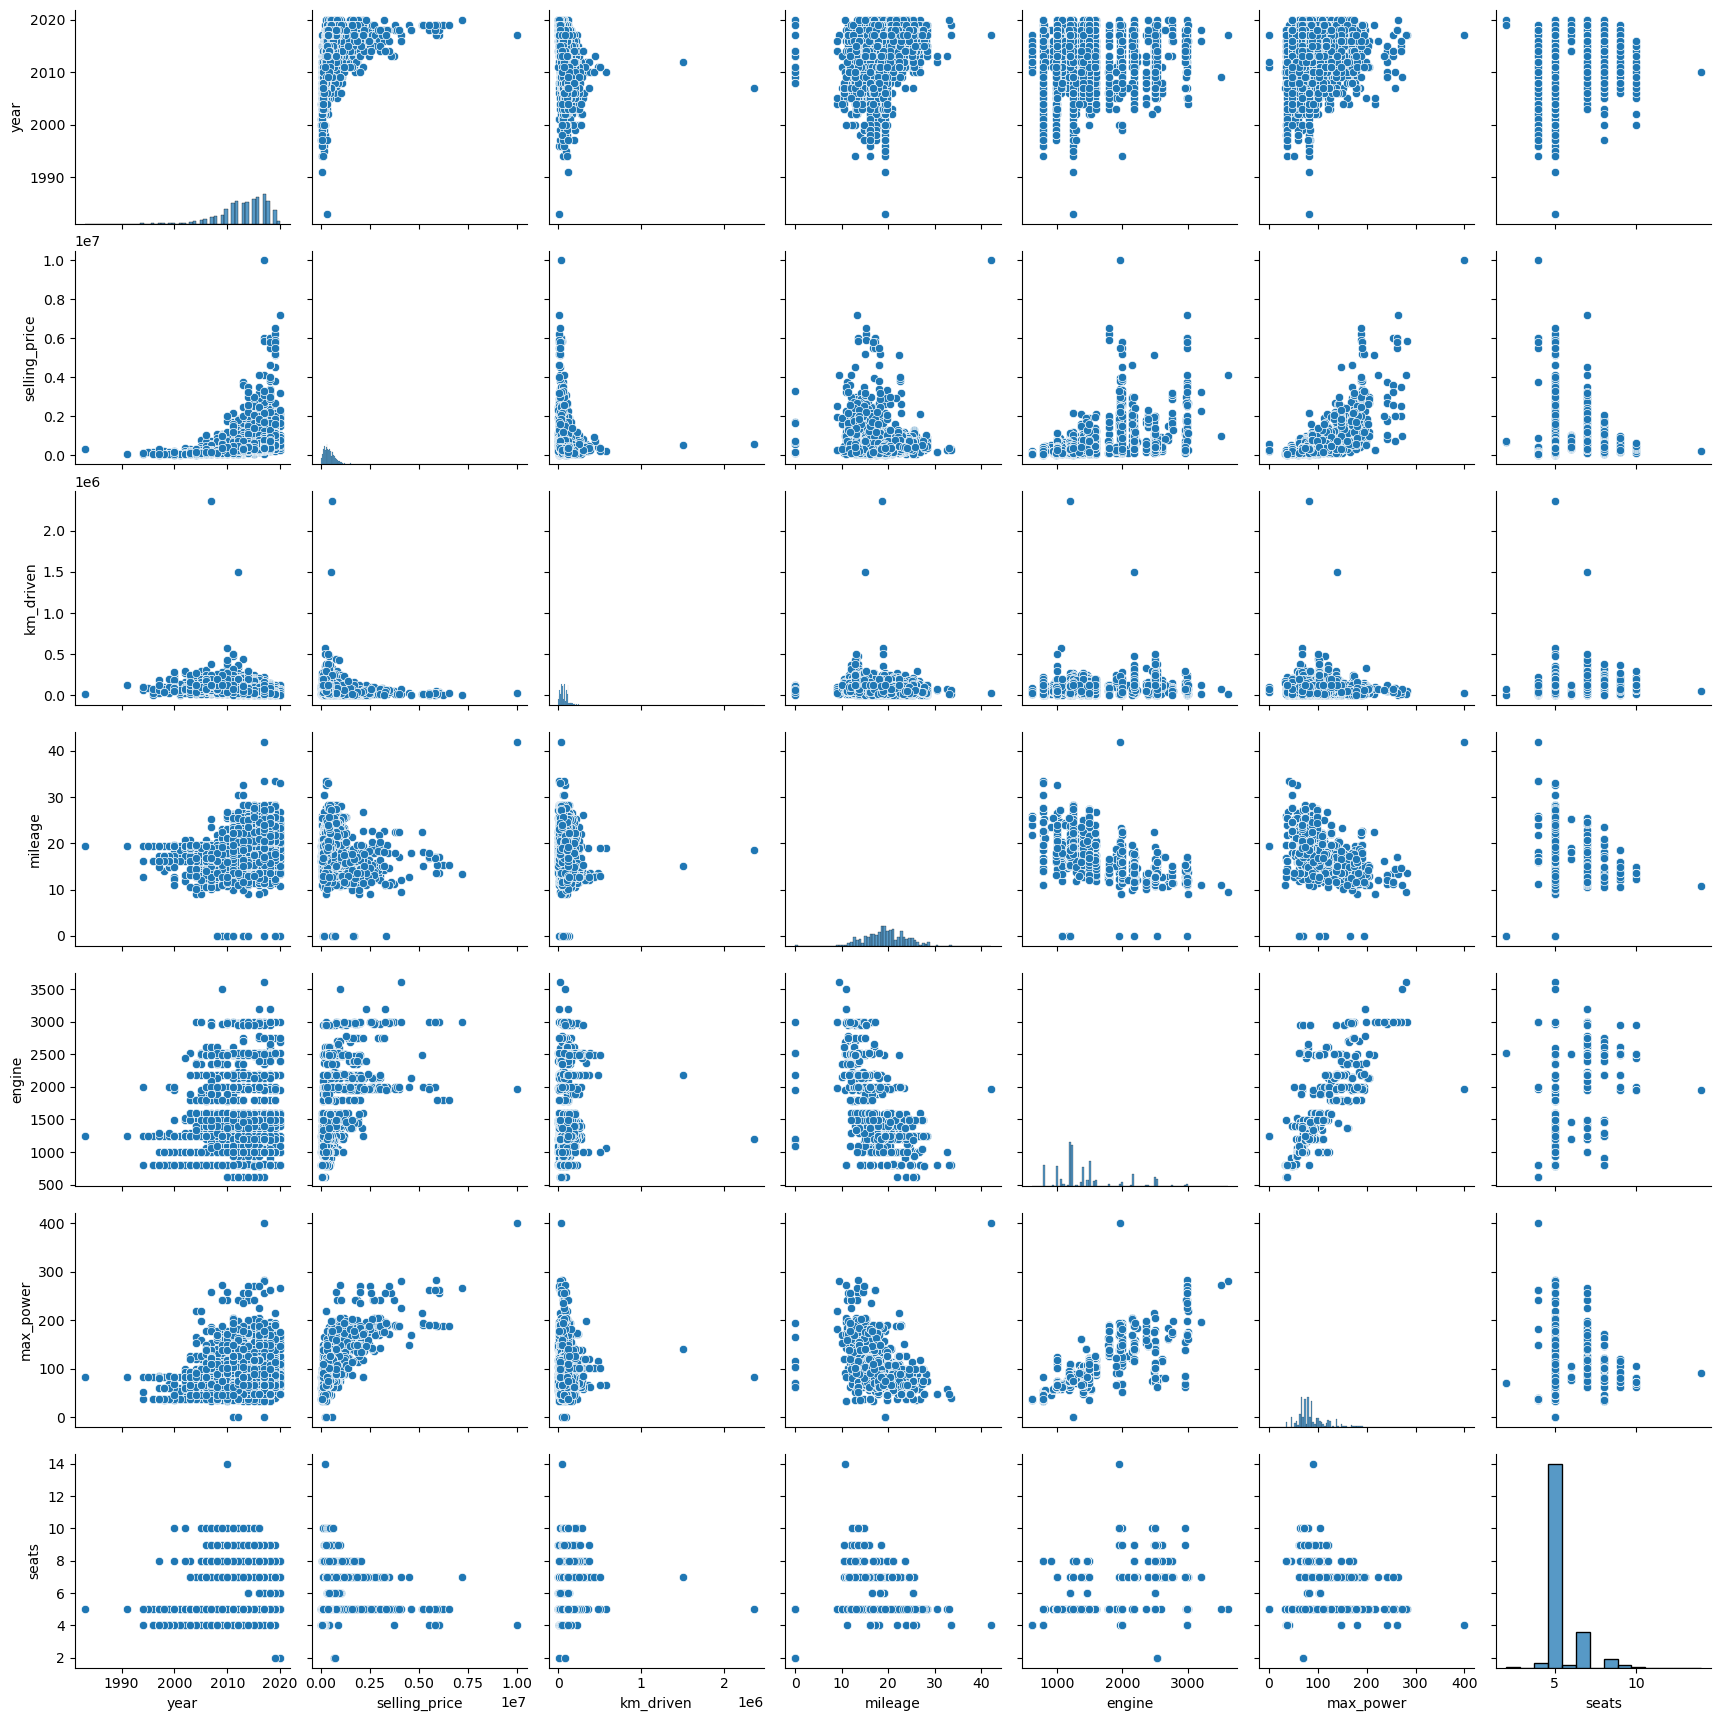

In [28]:
# your code here

sns.pairplot(df_train_new)

Этот график не такой информативный, как можно было бы построить, беря признаки по отдельности. Но он позволяет сделать некоторые (возможно, далеко идущие) выводы. Впрочем, со многими из них (если не со всеми) вы бы справились умозрительно. Однако всегда приятно делать выводы, основываясь на данных.



* <font color='#FF6600'> Что можно сказать о связи предикторов с целевой переменной?
* А о корреляциях признаков? </font>

(0.25 балла) <font color='#9933CC'>Постройте pairplot по тестовым данным</font> и ответьте на вопрос <font color='#FF6600'>"Похожими ли оказались совокупности при разделении на трейн и тест?"</font>

In [29]:
print('В графиках есть небольщине различия, но в принципе они схожи')

В графиках есть небольщине различия, но в принципе они схожи


D:\anac\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


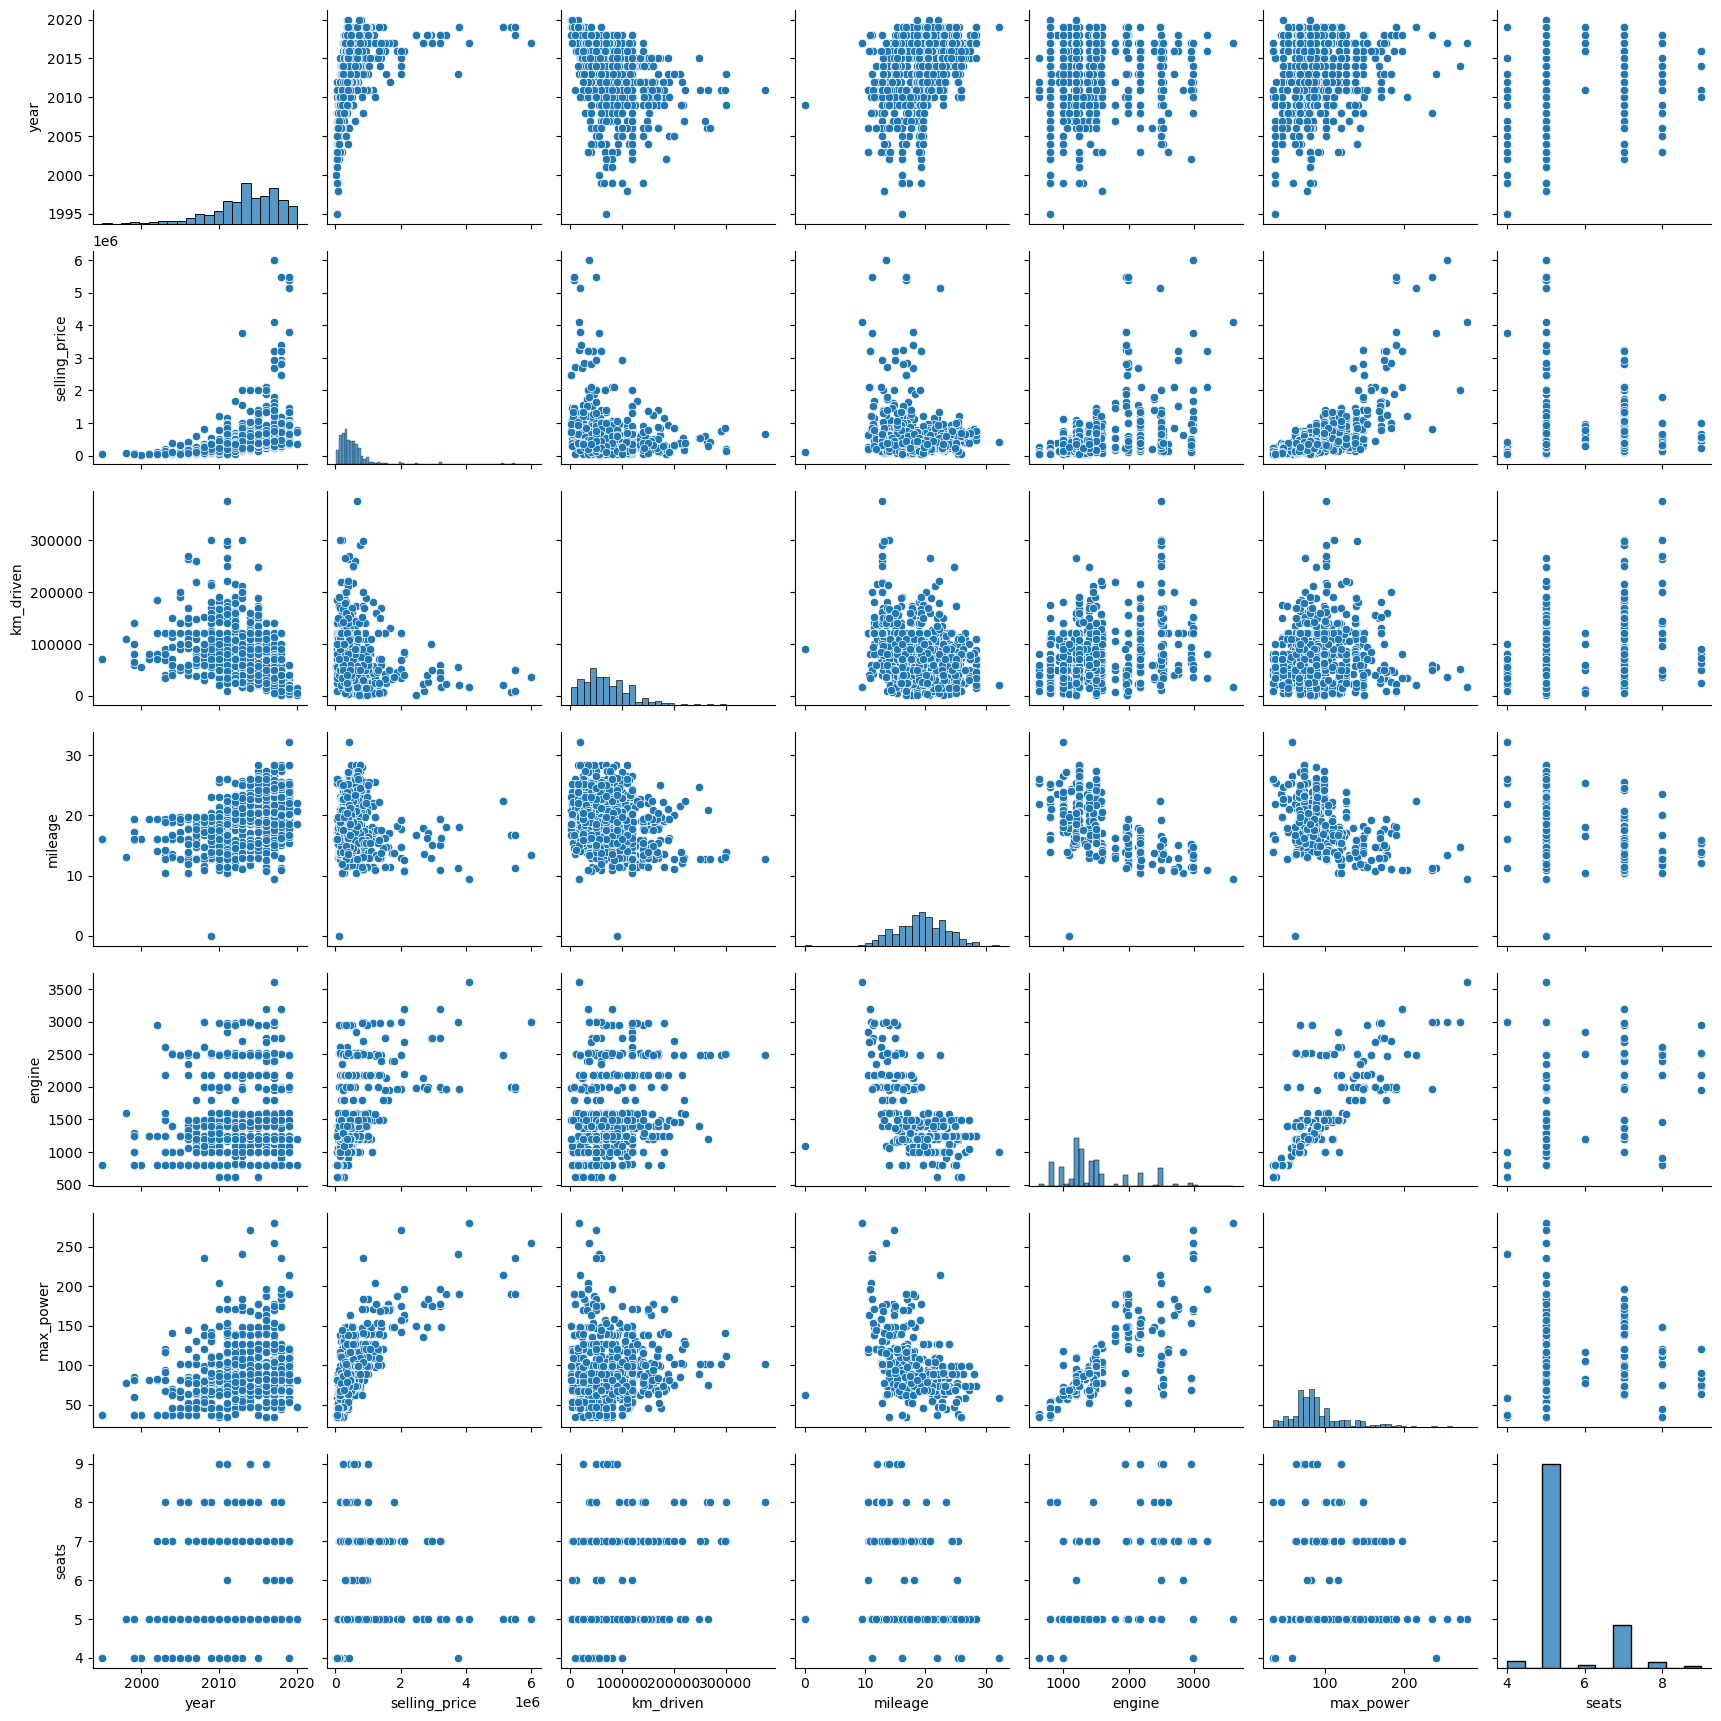

In [30]:
# your code here
sns.pairplot(df_test)

(0.25 балла) <font color='#9933CC'>Для трейна давайте построим тепловую карту (heatmap из библиотеки seaborn) попарных корреляций числовых колонок</font>

<Axes: >

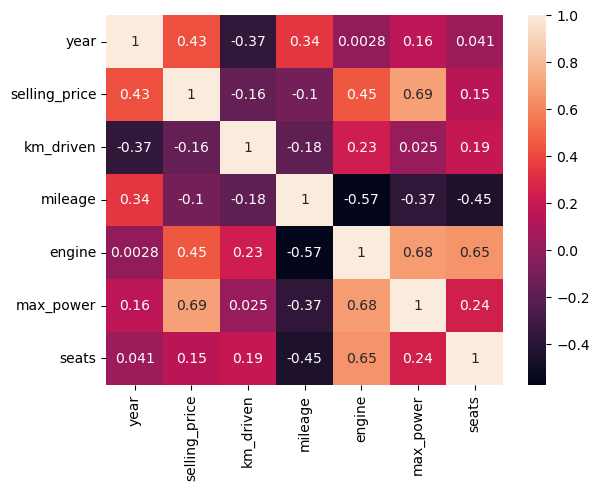

In [31]:
# your code here
df_train_chislo = df_train_new.drop('fuel', axis=1)
df_train_chislo = df_train_chislo.drop('seller_type', axis=1)
df_train_chislo = df_train_chislo.drop('transmission', axis =1)
df_train_chislo = df_train_chislo.drop('owner', axis = 1)
df_train_chislo = df_train_chislo.drop('name', axis = 1)
sns.heatmap(df_train_chislo.corr(), annot = True, fmt='.2g')

Ответьте, пожалуйста, на вопросы: 
* <font color='#FF6600'>Какие 2 признака наименее скоррелированы между собой?</font>
* <font color='#FF6600'>Между какими наблюдается довольно сильная положительная линейная зависимость?</font>
* <font color='#FF6600'>Правильно ли, опираясь на данные, утверждать, что чем меньше год, тем, скорее всего, больше километров проехала машина к дате продажи.</font>

In [32]:
print('признаки year and engine наименее скоррелированы между собой')
print()
print('признаки между которыми есть сильная положительная зависимость это max_power and selling_price')
print()
print('Так как у нас корреляция не равна -1 между year and km_driven значит прям точно утверждать такое нельзя, в каких-то моментах такое есть, но не всегда')

признаки year and engine наименее скоррелированы между собой

признаки между которыми есть сильная положительная зависимость это max_power and selling_price

Так как у нас корреляция не равна -1 между year and km_driven значит прям точно утверждать такое нельзя, в каких-то моментах такое есть, но не всегда


(0.25 балла) <font color='#9933CC'> Отобразите диаграммe рассеяния для наиболее скореллированной пары **признаков** (на трейне) </font>

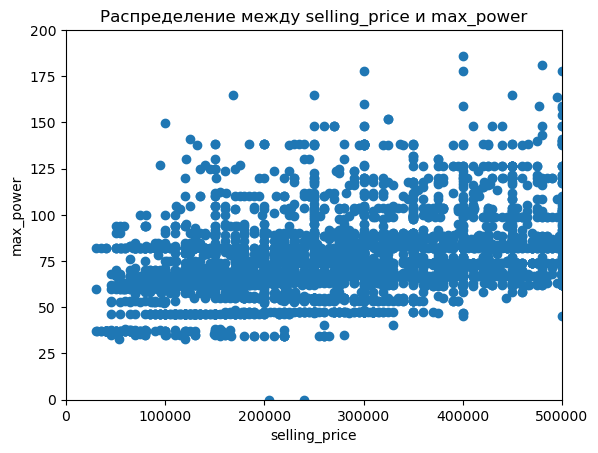

In [33]:
# your code here
plt.scatter(df_train_chislo['selling_price'], df_train_chislo['max_power'])
plt.ticklabel_format(style='plain')
plt.ylim(0, 200)
plt.xlim(0, 500000)
plt.xlabel('selling_price')
plt.ylabel('max_power')
plt.title('Распределение между selling_price и max_power')
plt.show()

### Дополнительные визуализации (бонус 0.5 балла)

Если вам кажется, что мы не попросили вас нарисовать какие-то очень важные зависимости, нарисуйте их и поясните.

In [34]:
print('Думаю, что стоит посмотреть 2 графика 2х оставшихся наиболее сколлерированных пар в трейне')

Думаю, что стоит посмотреть 2 графика 2х оставшихся наиболее сколлерированных пар в трейне


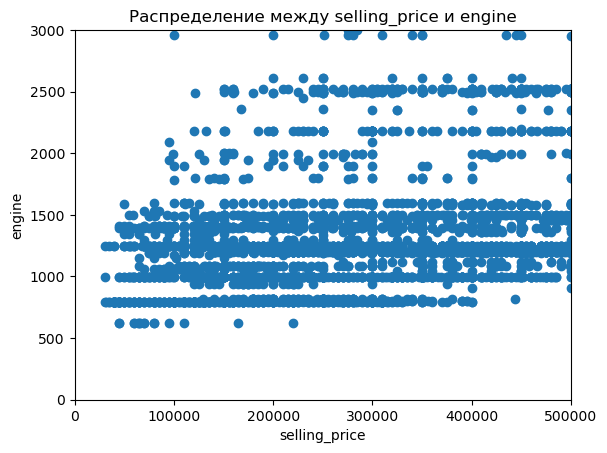

In [35]:
# your code here
# df_train.hist(df_train.transmission)
plt.scatter(df_train_chislo['selling_price'], df_train_chislo['engine'])
plt.ticklabel_format(style='plain')
plt.ylim(0, 3000)
plt.xlim(0, 500000)
plt.xlabel('selling_price')
plt.ylabel('engine')
plt.title('Распределение между selling_price и engine')
plt.show()

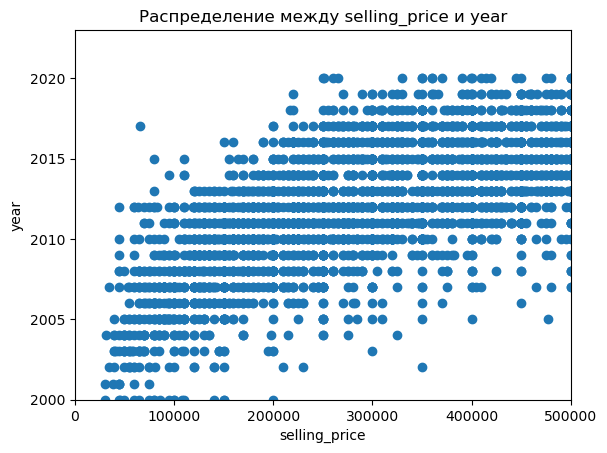

In [36]:
plt.scatter(df_train_chislo.selling_price, df_train_chislo.year)
plt.ticklabel_format(style='plain')
plt.ylim(2000, 2023)
plt.xlim(0, 500000)
plt.xlabel('selling_price')
plt.ylabel('year')
plt.title('Распределение между selling_price и year')
plt.show()

# Часть 2 (1.25 балла) | Модель только на вещественных признаках

(0.05 балла) <font color='#9933CC'>В переменные ``y_train`` и ``y_test`` запишите значения целевых переменных. Столбцы ``selling_price`` из датафреймов необходимо удалить. Категориальные (все, кроме ``seats``) столбцы тоже.</font>

In [37]:
y_train = df_train_new.selling_price
X_train = df_train_new.drop(['name','fuel','seller_type','transmission', 'owner', 'selling_price'], axis=1)
X_train

,year,km_driven,mileage,engine,max_power,seats
0,2014,145500,23.40,1248,74.00,5
1,2014,120000,21.14,1498,103.52,5
2,2010,127000,23.00,1396,90.00,5
3,2007,120000,16.10,1298,88.20,5
4,2017,45000,20.14,1197,81.86,5
...,...,...,...,...,...,...
5835,2008,191000,17.92,1086,62.10,5
5836,2013,50000,18.90,998,67.10,5
5837,2013,110000,18.50,1197,82.85,5
5838,2007,119000,16.80,1493,110.00,5


In [38]:
 X_train.shape == (5840, 6)

True

In [39]:
y_test = df_test.selling_price
X_test_onehot = df_test.copy()
X_test = df_test.drop('selling_price', axis =1)
X_test = X_test.drop('name', axis=1)
X_test = X_test.drop('fuel', axis=1)
X_test = X_test.drop('seller_type', axis=1)
X_test = X_test.drop('transmission', axis=1)
X_test = X_test.drop('owner', axis=1)


In [40]:
X_test.shape == (1000, 6)

True

(0.2 балла) <font color='#9933CC'>Обучите классическую линейную регрессию с дефолтными параметрами. Посчтитайте $R^2$ и MSE для трейна и для теста</font>

**Замечание:** $R^2$ и MSE для трейна и для теста выводите везде, где требуется обучать модели, даже если в явном виде этого не просят. Иначе непонятно, как понять, насколько успешны наши эксперименты.

In [41]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error as MSE

# your code here
model = LinearRegression()
model.fit(X_train, y_train)



LinearRegression()

In [42]:

pred_mse = model.predict(X_test)
train_mse = model.predict(X_train)

In [43]:
r2_test = r2_score(y_test, pred_mse)

In [44]:
r2_train = r2_score(y_train, model.predict(X_train))

In [45]:
mse_test = MSE(y_test, pred_mse)
mse_train = MSE(y_train, train_mse)
mse_train

116874153930.02924

Запомните правило:

> Использую линейную модель -- стандартизирую фичи

(0.25 балла) <font color='#9933CC'>Воспользуемся им</font>


In [46]:
from sklearn.preprocessing import StandardScaler

# your code here
scaler = StandardScaler()
X_scaler_stand = scaler.fit_transform(X_train)
X = pd.DataFrame(data= X_scaler_stand)
X.head()
X_train

,year,km_driven,mileage,engine,max_power,seats
0,2014,145500,23.40,1248,74.00,5
1,2014,120000,21.14,1498,103.52,5
2,2010,127000,23.00,1396,90.00,5
3,2007,120000,16.10,1298,88.20,5
4,2017,45000,20.14,1197,81.86,5
...,...,...,...,...,...,...
5835,2008,191000,17.92,1086,62.10,5
5836,2013,50000,18.90,998,67.10,5
5837,2013,110000,18.50,1197,82.85,5
5838,2007,119000,16.80,1493,110.00,5


In [47]:
scaler.mean_

array([2.01342842e+03, 7.39522425e+04, 1.94308408e+01, 1.42944897e+03,
       8.79063707e+01, 5.42671233e+00])

In [48]:
scaler.scale_

array([4.09527128e+00, 6.00659932e+04, 3.98563188e+00, 4.85621251e+02,
       3.16377093e+01, 9.82259842e-01])

In [49]:
scaler_test = StandardScaler().fit(X_test)

In [50]:
scaler_test.mean_

array([2.0136810e+03, 7.1393341e+04, 1.9338810e+01, 1.4548760e+03,
       9.0841670e+01, 5.4030000e+00])

In [51]:
scaler_test.scale_

array([4.01014202e+00, 4.84619695e+04, 3.94977370e+00, 5.21734676e+02,
       3.48759376e+01, 9.12464246e-01])

In [52]:

np.set_printoptions(precision=3, suppress=True)
model.coef_

array([ 37304.628,     -0.735,   7234.468,    125.98 ,  10203.247,
       -23628.302])

In [53]:
r2_train

0.5922591702157292

Не очень результативно.

Зато уже сейчас можем интерпретировать модель. <font color='#FF6600'>"Какой признак оказался наиболее информативным в предсказании цены?"</font>

In [54]:
# your code here
print('Если так считать что веса идут по порядку, то получается признак year')

Если так считать что веса идут по порядку, то получается признак year


(0.25 балла) <font color='#9933CC'>Теперь попробуем Lasso-регрессию.</font> Здесь и дальше обучайте модели на нормализованных признаках

In [55]:
from sklearn.linear_model import Lasso

# your code here
model_l1=Lasso()

model_l1.fit(X_train, y_train)

pred_l1 = model_l1.predict(X_test)

np.set_printoptions(precision=3, suppress=True)
print('веса:',model_l1.coef_)
print()
print('r2',r2_score(y_test, pred_l1))

веса: [ 37304.487     -0.735   7234.501    125.976  10203.274 -23626.119]

r2 0.594141702350865


<font color='#FF6600'>Занулила ли L1-регуляризация с параметрами по умолчанию какие-нибудь веса? Почему же?</font>

In [56]:
# your code here
print('Нет, из этого следует, что наши все параметры(веса) важны для модели ')

Нет, из этого следует, что наши все параметры(веса) важны для модели 


(0.25 балла) <font color='#9933CC'>Перебором по сетке (c 10-ю фолдами) подберите оптимальные параметры для Lasso-регрессии</font>

Вам пригодится класс [GridSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html).

In [57]:
from sklearn.model_selection import GridSearchCV
import timeit
# your code here
parameters = {'alpha': [0.01, 0.1, 1, 10, 100, 1000, 5000, 10_000, 20_000, 50_000, 100_000, 500_000, 1_000_00]}
grid_serach= GridSearchCV(model_l1, parameters, cv = 10)

start = timeit.default_timer()
grid_serach.fit(X_train, y_train)
end = timeit.default_timer()
grid_test = grid_serach.predict(X_test)


print(end-start)
best_alpha = grid_serach.best_params_['alpha']
print("Оптимальный вариант:", best_alpha)

0.4703414998948574
Оптимальный вариант: 0.01


<font color='#FF6600'>Сколько грид-сёрчу пришлось обучать моделей?</font>

In [58]:
print(f'пришлось обучать {end-start}')

пришлось обучать 0.4703414998948574


<font color='#FF6600'>Какой коэффициент регуляризации у лучшей из перебранных моделей? Занулились ли какие-нибудь из весов при такой регуляризации?</font>

In [59]:
print(f'лучшая модель если не брать гребневаю, то это Лассо и там получается приальфа = 0.01, зануления нет ')

лучшая модель если не брать гребневаю, то это Лассо и там получается приальфа = 0.01, зануления нет 


In [60]:
# your code here
model_l1=Lasso(alpha=0.01)

model_l1.fit(X_train, y_train)

pred_l1 = model_l1.predict(X_test)
np.set_printoptions(precision=3, suppress=True)

print('Время обучения', end - start)
print("Оптимальный вариант:", best_alpha)
print('зануления при альфа = 0.01, нет')
r2_score(y_test, pred_l1)

Время обучения 0.4703414998948574
Оптимальный вариант: 0.01
зануления при альфа = 0.01, нет


0.594141976708484

(0.25 балла) <font color='#9933CC'>Перебором по сетке (c 10-ю фолдами) подберите оптимальные параметры для [ElasticNet](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.ElasticNet.html)-регрессии</font>

In [61]:
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import GridSearchCV

# your code here
model_l2 = ElasticNet()
parameters = {'alpha': [0.01, 0.1, 1, 10, 100, 1000, 5000, 10_000, 20_000, 50_000, 100_000, 500_000, 1_000_00]}

grid_search_l2 = GridSearchCV(model_l2, parameters, cv=10)

start = timeit.default_timer()
grid_search_l2.fit(X_train, y_train)
end = timeit.default_timer()

pred_l2 = grid_search_l2.predict(X_test)

print(end- start)



0.406118500046432


<font color='#FF6600'>Какие гиперпараметры соответствуют лучшей из перебранных моделей?</font>

In [62]:
# your code here
best_param_l2 = grid_search_l2.best_params_
print("Оптимальный вариант:", best_param_l2)


Оптимальный вариант: {'alpha': 0.01}


Предлагаем вам оставить вам попытки заметно улучшить качество модели регуляризацией и перейти к следующей части задания.

# Часть 3 (0.5 балла) | Добавляем категориальные фичи



(0 баллов) <font color='#9933CC'>Из ``df_train`` удалите столбцы с целевой переменной и названием автомобиля.</font>

In [63]:
# your code here
X_train_cat = df_train_new_1.drop(['name', 'selling_price'], axis=1)

In [64]:
assert X_train_cat.shape == (5840, 10)

In [65]:
X_train_cat.describe(include='object')
# X_train_cat.head(10)

,fuel,seller_type,transmission,owner
count,5840,5840,5840,5840
unique,4,3,2,5
top,Diesel,Individual,Manual,First Owner
freq,3177,5223,5336,3603


(0.5 балла) <font color='#9933CC'>Закодируйте категориалльные фичи и ``seats`` методом OneHot-кодирования</font>

> Обратите внимание, что во избежание мультиколлинеарности следует избавиться от одного из полученных столбцов при кодировании каждого признака методом OneHot. 

In [66]:
from sklearn.preprocessing import OneHotEncoder # или можно использовать get_dummies из библиотеки pandas
# для трейна
# your code here
df_onehot = X_train_cat.copy()
df_onehot.columns
onehotencoder=OneHotEncoder(sparse_output=False)
cat_col= ['fuel','seller_type', 'transmission', 'owner', 'seats' ]

data_onehot = onehotencoder.fit_transform(df_onehot[cat_col])
col_onehot = pd.DataFrame(data_onehot)


col_onehot.columns=onehotencoder.get_feature_names_out()

X_train_cat = X_train_cat.join(col_onehot)
X_train_cat.drop(['fuel','seller_type', 'transmission', 'owner', 'seats'], axis = 1, inplace=True)

In [67]:
X_train_cat

,year,km_driven,mileage,engine,max_power,fuel_CNG,fuel_Diesel,fuel_LPG,fuel_Petrol,seller_type_Dealer,...,owner_Third Owner,seats_2,seats_4,seats_5,seats_6,seats_7,seats_8,seats_9,seats_10,seats_14
0,2014,145500,23.40,1248,74.00,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2014,120000,21.14,1498,103.52,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2010,127000,23.00,1396,90.00,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2007,120000,16.10,1298,88.20,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2017,45000,20.14,1197,81.86,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5835,2008,191000,17.92,1086,62.10,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
5836,2013,50000,18.90,998,67.10,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
5837,2013,110000,18.50,1197,82.85,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
5838,2007,119000,16.80,1493,110.00,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [68]:
# Для теста

df_onehot_test = X_test_onehot.copy()


data_onehot_test = onehotencoder.transform(df_onehot_test[cat_col])
col_onehot_test = pd.DataFrame(data_onehot_test)


col_onehot_test.columns=onehotencoder.get_feature_names_out()
X_test_onehot = X_test_onehot.join(col_onehot)
X_test_onehot.drop(['fuel','seller_type', 'transmission', 'owner', 'seats', 'name', 'selling_price'], axis = 1, inplace=True)
X_test_onehot.columns

Index(['year', 'km_driven', 'mileage', 'engine', 'max_power', 'fuel_CNG',
       'fuel_Diesel', 'fuel_LPG', 'fuel_Petrol', 'seller_type_Dealer',
       'seller_type_Individual', 'seller_type_Trustmark Dealer',
       'transmission_Automatic', 'transmission_Manual', 'owner_First Owner',
       'owner_Fourth & Above Owner', 'owner_Second Owner',
       'owner_Test Drive Car', 'owner_Third Owner', 'seats_2', 'seats_4',
       'seats_5', 'seats_6', 'seats_7', 'seats_8', 'seats_9', 'seats_10',
       'seats_14'],
      dtype='object')

(0.25 балла) <font color='#9933CC'>Переберите параметр регуляризации `alpha` для гребневой (ridge) регрессии с помощью класса `GridSearchCV`.</font> В качестве параметров при объявлении GridSearchCV кроме модели укажите метрику качества $R^2$. Кроссвалидируйтесь по 10-ти фолдам.

<font color='#FF6600'>Удалось ли улучшить качество предсказаний?</font>

In [69]:
print('да удалость, на 0.11 приблизительно так')

да удалость, на 0.11 приблизительно так


In [70]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

# your code here

model_l3 = Ridge()
parameters = {'alpha': [0.01, 0.1, 1, 10, 100, 1000, 5000, 10_000, 20_000, 50_000, 100_000, 500_000, 1_000_00]}

grid_search_l3 = GridSearchCV(model_l3, parameters, cv=10)

start = timeit.default_timer()
grid_search_l3.fit(X_train_cat, y_train)
end = timeit.default_timer()

pred_l3 = grid_search_l3.predict(X_test_onehot)

# print(end- start)
r2_score(y_test, pred_l3)
# X_train_cat

0.5151097437155102

In [71]:
X_train_cat.columns

Index(['year', 'km_driven', 'mileage', 'engine', 'max_power', 'fuel_CNG',
       'fuel_Diesel', 'fuel_LPG', 'fuel_Petrol', 'seller_type_Dealer',
       'seller_type_Individual', 'seller_type_Trustmark Dealer',
       'transmission_Automatic', 'transmission_Manual', 'owner_First Owner',
       'owner_Fourth & Above Owner', 'owner_Second Owner',
       'owner_Test Drive Car', 'owner_Third Owner', 'seats_2', 'seats_4',
       'seats_5', 'seats_6', 'seats_7', 'seats_8', 'seats_9', 'seats_10',
       'seats_14'],
      dtype='object')

In [72]:
X_test_onehot.columns

Index(['year', 'km_driven', 'mileage', 'engine', 'max_power', 'fuel_CNG',
       'fuel_Diesel', 'fuel_LPG', 'fuel_Petrol', 'seller_type_Dealer',
       'seller_type_Individual', 'seller_type_Trustmark Dealer',
       'transmission_Automatic', 'transmission_Manual', 'owner_First Owner',
       'owner_Fourth & Above Owner', 'owner_Second Owner',
       'owner_Test Drive Car', 'owner_Third Owner', 'seats_2', 'seats_4',
       'seats_5', 'seats_6', 'seats_7', 'seats_8', 'seats_9', 'seats_10',
       'seats_14'],
      dtype='object')

# Часть 4 - бонусная (1.5 балла) | Feature Engineering 

В этой части домашнего задания вам предлагается проявить свою креативность для улучшения прогноза модели. Любые другие модели, кроме различных форм линейной (или полиномиальной) регресси, использовать запрещается. А значит, придется работать с признаками

**Что можно попробовать сделать?** (каждый пункт по 0.4 балла, но не больше 2-х баллов в сумме)

1.   *Сгенерировать новые признаки на основе уже существующих:*
    * посчитать произведения // частные признаков (кажется, что посчитать число "лошадей" на литр объема может быть полезно);
    * имеет смысл обратить внимание на визуализации в части с EDA (к примеру, зависимость цены от года выглядит квадратичной, а не линейной; значит, квадрат года нам, скорее всего, принесет больше пользы)

2.   *Добыть новые признаки:*
    * имеем название автомобиля, которое никак не используем (можно спарсить инфу о классе автомобиля или каких-то специфических опциях)
    * можно добавить пороговые признаки вроде "владелец третий или больше" и объединить признаки в некоторые осмысленные правила, например "первый или второй владелец и продавец официальный дилер" (подбирать пороги удобно по диаграммам рассеяния)

3.   *Поработать с уже имеющимися:*
    * далеко не факт, что заполнить пропуск медианой было лучшей идеей (как минимум, можно добавить dummy-столбец для модели, сигнализирующий, что раньше на месте медианы был пропуск -- там где он был, конечно); попробуйте другие способы филлинга;
    * мы не анализировали, есть ли в данных выбросы => никак выбросы не обрабатывали; наиболее простым и, тем не менее, довольно полезным вариантом нахождения выбросов могут послужить boxplot'ы для каждого столбца; что делать с выбросами думайте сами :) -- вариантов довольно много
    * мы толком не смотрели на таргет сам по себе; в нем тоже могут быть неожиданности -- стоит хотя бы проверить
    * можно заметить, что некоторые признаки распределены совсем не нормально; возможно их стоит отлогарифмировать

И так далее...

Feel Free to Try!

In [73]:
# your code here
# X_train_cat - трейн
# X_test_onehot - тест
# создаем новые признаки
import datetime
import pickle
curren_date = datetime.datetime.now()
current_year = curren_date.year
df_train_new = X_train_cat.copy()
df_test_new = X_test_onehot.copy()

df_train_new_1['mean_km'] = df_train_new_1.groupby('fuel')['km_driven'].transform('mean')

df_train_new_1['year_of_car'] = df_train_new_1['year'].apply(lambda x: current_year - x)

col_kv = ['year**2','km_driven**2','mileage**2','engine**2', 'max_power**2']
col_ne_cv = ['year','km_driven','mileage','engine', 'max_power']

df_train_new_1[col_kv] = df_train_new_1[col_ne_cv].apply(lambda x: x**2)
df_train_new_1[col_kv] =df_train_new_1[col_kv].apply(lambda x: round(x,2))

df_train_new_1['avg_KM_of_year']= df_train_new_1.km_driven / df_train_new_1.year_of_car
df_train_new_1['avg_KM_of_year'] = df_train_new_1.avg_KM_of_year.apply(lambda x: round(x,2))

df_train_new_1= df_train_new_1.drop(['selling_price', 'name'], axis =1)



In [74]:
df_train_new_1

,year,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats,mean_km,year_of_car,year**2,km_driven**2,mileage**2,engine**2,max_power**2,avg_KM_of_year
0,2014,145500,Diesel,Individual,Manual,First Owner,23.40,1248,74.00,5,88505.077746,9,4056196,-304586480,547.56,1557504,5476.00,16166.67
1,2014,120000,Diesel,Individual,Manual,Second Owner,21.14,1498,103.52,5,88505.077746,9,4056196,1515098112,446.90,2244004,10716.39,13333.33
2,2010,127000,Diesel,Individual,Manual,First Owner,23.00,1396,90.00,5,88505.077746,13,4040100,-1050869184,529.00,1948816,8100.00,9769.23
3,2007,120000,Petrol,Individual,Manual,First Owner,16.10,1298,88.20,5,55873.364482,16,4028049,1515098112,259.21,1684804,7779.24,7500.00
4,2017,45000,Petrol,Individual,Manual,First Owner,20.14,1197,81.86,5,55873.364482,6,4068289,2025000000,405.62,1432809,6701.06,7500.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5835,2008,191000,Petrol,Individual,Manual,First Owner,17.92,1086,62.10,5,55873.364482,15,4032064,2121261632,321.13,1179396,3856.41,12733.33
5836,2013,50000,Petrol,Individual,Manual,Second Owner,18.90,998,67.10,5,55873.364482,10,4052169,-1794967296,357.21,996004,4502.41,5000.00
5837,2013,110000,Petrol,Individual,Manual,First Owner,18.50,1197,82.85,5,55873.364482,10,4052169,-784901888,342.25,1432809,6864.12,11000.00
5838,2007,119000,Diesel,Individual,Manual,Fourth & Above Owner,16.80,1493,110.00,5,88505.077746,16,4028049,1276098112,282.24,2229049,12100.00,7437.50


In [75]:
# df_test
df_test_new_1 = df_test.copy()

df_test_new_1['mean_km'] = df_test_new_1.groupby('fuel')['km_driven'].transform('mean')

df_test_new_1['year_of_car'] = df_test_new_1['year'].apply(lambda x: current_year - x)

df_test_new_1[col_kv] = df_test_new_1[col_ne_cv].apply(lambda x: x**2)
df_test_new_1[col_kv] =df_test_new_1[col_kv].apply(lambda x: round(x,2))

df_test_new_1['avg_KM_of_year']= df_test_new_1.km_driven / df_train_new_1.year_of_car
df_test_new_1['avg_KM_of_year'] = df_test_new_1.avg_KM_of_year.apply(lambda x: round(x,2))

df_test_new_1= df_test_new_1.drop(['selling_price', 'name'], axis =1)


In [76]:
# исследуем выбросы 
# import scipy.stats as stats
# numeric_columns = df_test_new_1.select_dtypes(include=['int', 'float']).columns
# # z_year = np.abs(stats.zscore(df_train_new_1.year))
# sns.boxplot(data=df_train_new_1.km_driven)

In [77]:
# ОneHot- кодирование для трейна и теста
onehot_cod_train = df_train_new_1.copy()

onehotencoder=OneHotEncoder(sparse_output=False)
cat_col= ['fuel','seller_type', 'transmission', 'owner', 'seats' ]

onehot_cod_train = onehotencoder.fit_transform(onehot_cod_train[cat_col])
col_onehot_train = pd.DataFrame(onehot_cod_train)


col_onehot_train.columns=onehotencoder.get_feature_names_out()

df_train_new_1 = df_train_new_1.join(col_onehot_train)
df_train_new_1.drop(['fuel','seller_type', 'transmission', 'owner', 'seats'], axis = 1, inplace=True)



In [78]:
file_path = 'C:\\Users\\Егор\\HSE\\Machine_Learning\\HW_1\\onehotencod.pkl'
with open(file_path, 'wb') as file:
    pickle.dump(onehotencoder, file)

In [79]:
# Стандартизация модели 
X_train = df_train_new_1.copy()
X_test = df_test_new_1.copy()
scaler = StandardScaler()
df_X= scaler.fit_transform(X_train)
X_t = pd.DataFrame(data= df_X)
# X_t.head()
# X_train

In [80]:
file_path = 'C:\\Users\\Егор\\HSE\\Machine_Learning\\HW_1\\scaler.pkl'
with open(file_path, 'wb') as file:
    pickle.dump(scaler, file)

In [81]:
# ОneHot- кодирование для и теста
onehot_cod_test = df_test_new_1.copy()


onehot_cod_test = onehotencoder.transform(onehot_cod_test[cat_col])
col_onehot_test = pd.DataFrame(onehot_cod_test)


col_onehot_test.columns=onehotencoder.get_feature_names_out()

df_test_new_1 = df_test_new_1.join(col_onehot_train)
df_test_new_1.drop(['fuel','seller_type', 'transmission', 'owner', 'seats'], axis = 1, inplace=True)


In [82]:
X_train = df_train_new_1.copy()
X_test = df_test_new_1.copy()

model = LinearRegression()
model_l1 =Lasso(max_iter=10**5, tol = 1.599e+11)
model_l2 = ElasticNet(max_iter=10**5, tol =  1.599e+11)
model_l3 = Ridge( max_iter=10**5, tol =  1.599e+11)




In [83]:
# LinerRegrssion
model.fit(X_train, y_train)
pred_Lin = model.predict(X_test)
train_Lin = model.predict(X_train)
r2_score(y_test, pred_Lin)

0.6686230369126653

In [84]:
# Lasso
parameters = {'alpha': [0.01, 0.1, 1, 10, 100, 1000, 5000, 10_000, 20_000, 50_000, 100_000, 500_000, 1_000_00]}

grid_search_l_Lasso = GridSearchCV(model_l1, parameters, cv=10)

start = timeit.default_timer()
grid_search_l_Lasso.fit(X_train, y_train)
end = timeit.default_timer()



pred_l_Lasso = grid_search_l_Lasso.predict(X_test)

grid_search_l_Lasso.best_estimator_
# r2_score(y_test, pred_l_Lasso)

Lasso(alpha=1000, max_iter=100000, tol=159900000000.0)

In [85]:
# Elastic
parameters = {'alpha': [0.01, 0.1, 1, 10, 100, 1000, 5000, 10_000, 20_000, 50_000, 100_000, 500_000, 1_000_00]}

grid_search_l_Ellastic = GridSearchCV(model_l2, parameters, cv=10)

start = timeit.default_timer()
grid_search_l_Ellastic.fit(X_train, y_train)
end = timeit.default_timer()

pred_l_Ellastic = grid_search_l_Ellastic.predict(X_test)

r2_score(y_test, pred_l_Ellastic)

0.5850055604517682

In [86]:
# Ridge
parameters = {'alpha': [0.0001, 0.1, 1, 10, 100, 1000, 5000, 10_000, 20_000, 50_000, 100_000, 500_000, 1_000_00]}

par = { 'alpha': [0.0001] }

grid_search_l_Ridge = GridSearchCV(model_l3, par, cv=10)

start = timeit.default_timer()
grid_search_l_Ridge.fit(X_train, np.log(y_train+1))
grid_search_l_Ridge_log = grid_search_l_Ridge.fit(X_train, np.log(y_train+1))
end = timeit.default_timer()

pred_l_Ridge = np.exp(grid_search_l_Ridge.predict(X_test))-1

grid_search_l_Ridge.best_estimator_
r2_score(y_test, pred_l_Ridge)

D:\anac\Lib\site-packages\sklearn\linear_model\_ridge.py:211: LinAlgWarning: Ill-conditioned matrix (rcond=1.04039e-26): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
D:\anac\Lib\site-packages\sklearn\linear_model\_ridge.py:211: LinAlgWarning: Ill-conditioned matrix (rcond=1.04321e-26): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
D:\anac\Lib\site-packages\sklearn\linear_model\_ridge.py:211: LinAlgWarning: Ill-conditioned matrix (rcond=1.04069e-26): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
D:\anac\Lib\site-packages\sklearn\linear_model\_ridge.py:211: LinAlgWarning: Ill-conditioned matrix (rcond=1.04042e-26): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
D:\anac\Lib\site-packages\sklearn\linear_model\_ridge.py:211: LinAlgWarning: Ill-conditioned matrix (rcond=1.03417e-26): result may not be accur

0.7098016359339329

In [87]:
file_path = 'C:\\Users\\Егор\\HSE\\Machine_Learning\\HW_1\\grid_search_l_Ridge_log.pkl'
with open(file_path, 'wb') as file:
    pickle.dump(grid_search_l_Ridge_log, file)

# Часть Бизнесовая (0.5 балла)

Заказчик просил вас посчитать кастомную метрику -- среди всех предсказанных цен на авто посчитать долю предиктов, отличающихся от реальных цен на эти авто не более чем на 10% (в одну или другую сторону)

<font color='#9933CC'>Сделайте это самостоятельно для лучшей из своих моделей</font>

In [88]:
def business_metrics(y_true, y_pred):
    # your code here
    
    df = pd.DataFrame({'target_y': y_true, 'pred_y': y_pred})

    # Расчет разницы между предсказанными и реальными ценами в процентах
    df['price_difference'] = (df['pred_y'] - df['target_y']) / df['target_y'] * 100

    # Подсчет доли предсказаний, отличающихся от реальных цен не более чем на 10%
    within_10_percent = df[(df['price_difference'] >= -10) & (df['price_difference'] <= 10)]
    custom_metric = len(within_10_percent) / len(df) * 100

    return custom_metric

business_metrics(y_test, pred_Lin)

18.9

# Часть 5 (2.5 балла) | Реализация сервиса на FastAPI

Cделайте с помощью FastAPI сервис, который с точки зрения пользователя реализует две функции:

1. на вход в формате json подаются признаки одного объекта, на выходе сервис выдает предсказанную стоимость машины
2. на вход подается csv-файл с признаками тестовых объектов, на выходе получаем файл с +1 столбцом - предсказаниями на этих объектах

С точки зрения реализации это означает следующее:
- средствами pydantic должен быть описан класс базового объекта
- класс с коллецией объектов
- метод post, который получает на вход один объект описанного класса
- метод post, который получает на вход коллекцию объектов описанного класса

Шаблон для сервисной части дан ниже. Код необходимо дополнить и оформить в виде отдельного .py-файла.

In [105]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import OneHotEncoder
from joblib import dump, load

from sklearn.metrics import r2_score, mean_squared_error as MSE
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

random.seed(42)
np.random.seed(42)
# app = FastAPI()

df_train = pd.read_csv('https://raw.githubusercontent.com/hse-mlds/ml/main/hometasks/HT1/cars_train.csv')
df_test = pd.read_csv('https://raw.githubusercontent.com/hse-mlds/ml/main/hometasks/HT1/cars_test.csv')


# обработка данных
def obrabdates(old_df, type_df = 'new'):

    # работа с дубликатами
    columns_diplicates = ['name','year',
                         'km_driven','fuel',
                         'seller_type','transmission',
                         'owner','mileage','engine',
                         'max_power', 'torque', 'seats']
    df_train_f = old_df.drop_duplicates(subset = columns_diplicates, keep='first')    
    df_train_f = df_train_f.reset_index(drop=True)

    # обработка признаков

    df_train_f['mileage']= df_train_f['mileage'].str.extract(r'(\d+.\d+|\d+)')
    df_train_f['engine'] = df_train_f['engine'].str.extract(r'(\d+.\d+|\d+)')
    df_train_f['max_power'] = df_train_f['max_power'].str.extract(r'(\d+.\d+|\d+)')

    # type dates
    df_train_f['mileage'] = df_train_f['mileage'].astype(float)

    df_train_f.max_power = df_train_f.max_power.astype(str)
    df_train_f.max_power = df_train_f.max_power.str.replace(r'[^0-9.]+', '', regex=True)
    df_train_f['max_power'] = pd.to_numeric(df_train_f['max_power'], errors='coerce')
    df_train_f['max_power'] = df_train_f['max_power'].astype(float)

    df_train_f['engine'] = df_train_f['engine'].astype(float)


    # заполенение пустых значений медианой 
    med_mileage = df_train_f.mileage.median()
    med_engine = df_train_f.engine.median()
    med_max_power = df_train_f.max_power.median() 
    med_seats = df_train_f.seats.median()

    # заполнение пропусков в трейн и тест 
    df_train_f.mileage = df_train_f.mileage.fillna(med_mileage)
    df_train_f.engine = df_train_f.engine.fillna(med_engine)
    df_train_f.max_power = df_train_f.max_power.fillna(med_max_power)
    df_train_f.seats = df_train_f.seats.fillna(med_seats)

    # del torque
    df_train_f = df_train_f.drop('torque',axis = 1)
    df_test_f = df_test.drop('torque', axis = 1)

    # типы данных
    df_train_f['engine'] = df_train_f['engine'].astype(int)
    df_train_f['seats'] = df_train_f['seats'].astype(int)
    df_train_f['km_driven'] = df_train_f['km_driven'].astype(int)
    

    # доп.фичи
    df_train_f['mean_km'] = df_train_f.groupby('fuel')['km_driven'].transform('mean')

    df_train_f['year_of_car'] = df_train_f['year'].apply(lambda x: current_year - x)

    col_kv = ['year**2','km_driven**2','mileage**2','engine**2', 'max_power**2']
    col_ne_cv = ['year','km_driven','mileage','engine', 'max_power']

    df_train_f[col_kv] = df_train_f[col_ne_cv].apply(lambda x: x**2)
    df_train_f[col_kv] =df_train_f[col_kv].apply(lambda x: round(x,2))

    df_train_f['avg_KM_of_year']= df_train_f.km_driven / df_train_f.year_of_car
    df_train_f['avg_KM_of_year'] = df_train_f.avg_KM_of_year.apply(lambda x: round(x,2))
    
    

    # поиск целевой переменной
    if type_df == 'test':
        y_train_f = df_train_f[['selling_price']]
    elif type_df == 'pred':
        y_train_f = df_train_f[['selling_price']]
    else:
        y_train_f = None
    X_Final_train = df_train_f[['year', 'km_driven', 'fuel', 'seller_type',
                              'transmission','owner', 'mileage', 'engine','max_power',
                              'seats', 'mean_km', 'year_of_car',
                              'year**2','km_driven**2', 'mileage**2','engine**2',
                              'max_power**2','avg_KM_of_year']]
    
    return X_Final_train, y_train_f
X_train, y_train = obrabdates(df_train,type_df = 'pred')

(5840, 18) (5840, 1)


In [90]:
# логарифмирование целевой переменной
y_train['selling_price']= np.log(y_train['selling_price'])

In [91]:
onegotencod = OneHotEncoder(handle_unknown='ignore')
onegotencod.fit(X_train[['fuel','seller_type', 'transmission', 'owner', 'seats' ]])

dump(onegotencod, 'onegotencod.pkl')

['onegotencod.pkl']

In [98]:
# Работа с приизнаками категориальными
def onehotencod(X_st):
    X_cat = X_st[['fuel','seller_type', 'transmission', 'owner', 'seats' ]]
    onehotencod_load = load('onegotencod.pkl')
    encod_df_array = onehotencod_load.transform(X_cat).toarray()
    encod_df = pd.DataFrame(encod_df_array,
                              columns = onehotencod_load.get_feature_names_out(X_cat.columns)).reset_index(drop=True)
    X_final = X_st.drop(X_cat, axis = 1).reset_index(drop=True)
    X_endcod = pd.concat([X_final, encod_df], axis = 1)
    
    return X_endcod
X_ohe = onehotencod(X_train)

Index(['year', 'km_driven', 'mileage', 'engine', 'max_power', 'mean_km',
       'year_of_car', 'year**2', 'km_driven**2', 'mileage**2', 'engine**2',
       'max_power**2', 'avg_KM_of_year', 'fuel_CNG', 'fuel_Diesel', 'fuel_LPG',
       'fuel_Petrol', 'seller_type_Dealer', 'seller_type_Individual',
       'seller_type_Trustmark Dealer', 'transmission_Automatic',
       'transmission_Manual', 'owner_First Owner',
       'owner_Fourth & Above Owner', 'owner_Second Owner',
       'owner_Test Drive Car', 'owner_Third Owner', 'seats_2', 'seats_4',
       'seats_5', 'seats_6', 'seats_7', 'seats_8', 'seats_9', 'seats_10',
       'seats_14'],
      dtype='object')
(5840, 36)


In [100]:
# Стандартизация
scale = StandardScaler()
scale.fit_transform(X_ohe)
dump(scale, 'scale.pkl')

def standard(x):
    scaler_l = load('scale.pkl')
    X_ohe_scale = scaler_l.transform(x)
    X_ohe_scale = pd.DataFrame(X_ohe_scale, columns = x.columns)
    
    return X_ohe_scale
X_ohe_scale = standard(X_ohe)

(5840, 36)


In [101]:
# модель 
par = { 'alpha': [0.0001] }
model_final = Ridge()
grid_search_final = GridSearchCV(estimator = model_final, 
                                param_grid = par,
                                cv = 10,
                                scoring = 'r2')
grid_search_final.fit(X_ohe_scale, y_train)



GridSearchCV(cv=10, estimator=Ridge(), param_grid={'alpha': [0.0001]},
             scoring='r2')

In [102]:
# pkl file of model
dump(grid_search_final, 'grid_search_final.pkl')

['grid_search_final.pkl']

In [103]:
print("Самый лучший параметр alpha:", grid_search_final.best_params_['alpha'])
print("Качество модели через r2:", grid_search_final.best_score_)

Наилучший параметр alpha: 0.0001
Оценка качества модели (R^2): 0.8403581338849186


In [106]:
X_1, y_1 = obrabdates(df_test, type_df = 'pred')
X_1_encod = onehotencod(X_1)
X_1_encod_scale = standard(X_1_encod)

model_test = load('grid_search_final.pkl')

y_1_pred = model_test.predict(X_1_encod_scale)
y_1_pred = np.exp(y_1_pred)

In [109]:
print('r2 :' , r2_score(y_1, y_1_pred))
print('mse :' , MSE(y_1, y_1_pred))

r2 : 0.832976191722204
mse : 59807116028.56324


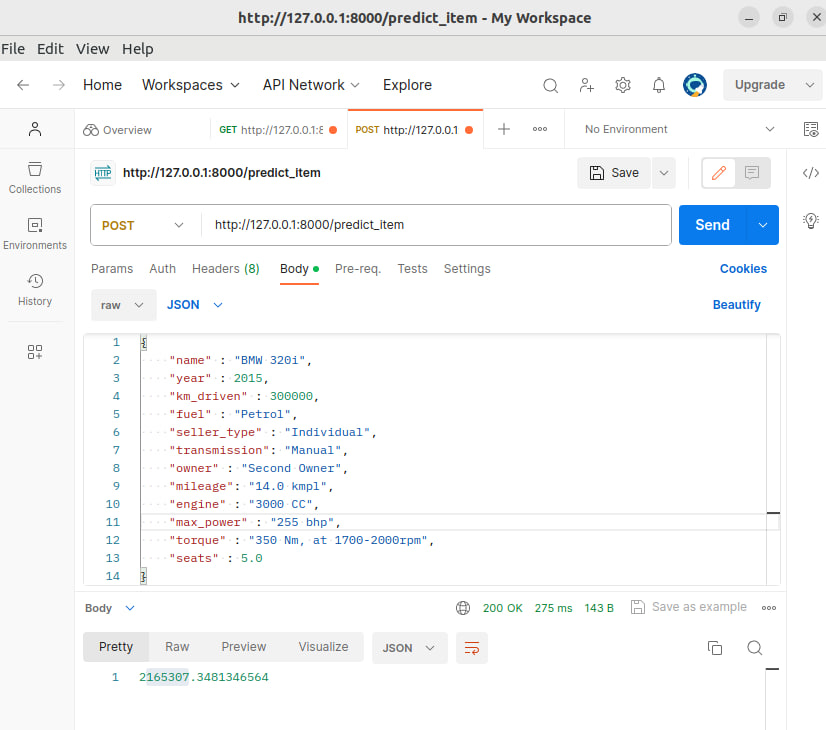

In [114]:
from IPython.display import Image

Image('C:\\Users\\Егор\\HSE\\Machine_Learning\\HW_1\\for_1.jpg')


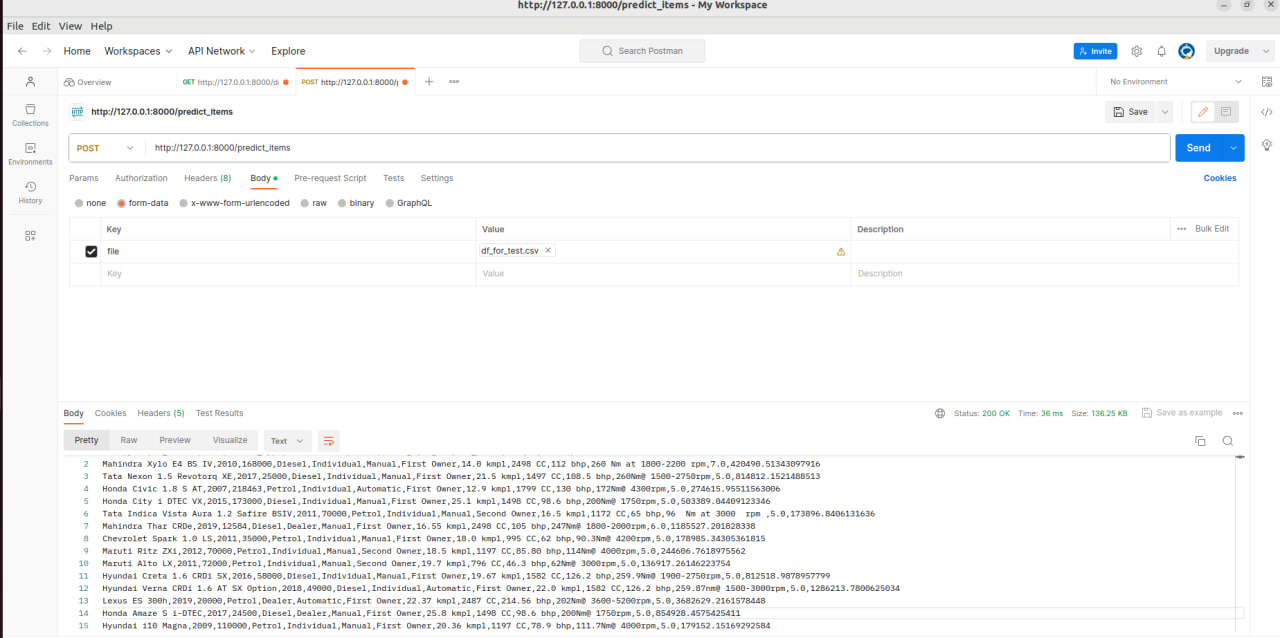

In [115]:
Image('C:\\Users\\Егор\\HSE\\Machine_Learning\\HW_1\\for_many.jpg')

Протестируйте сервис на корректность работы и приложите скриншоты (см. ниже).

# Часть 6 (1 балл) | Оформление результатов

**Результаты вашей работы** необходимо разместить в своем Гитхабе. Под результатами понимаем следующее:
* ``.ipynb``-ноутбук со всеми проведёнными вами экспериментами (output'ы ячеек, разумеется, сохранить)
* ``.py``-файл с реализацией сервиса
* ``.pickle``-файл с сохранёнными весами модели, коэффициентами скейлинга и прочими числовыми значениями, которые могут понадобиться для инференса
* ``.md``-файл с выводами про проделанной вами работе:
    * что было сделано
    * с какими результатами
    * что дало наибольший буст в качестве
    * что сделать не вышло и почему (это нормально, даже хорошо😀)

**За что могут быть сняты баллы в этом пункте:**
* за отсутствие ``.pickle``-файла с весами использованной модели
* за недостаточную аналитику в ``.md``-файле
* за оформление и логику кода (в определённом смысле это тоже элемент оформления решения)

**Как будет выглядет проверка всего домашнего задания?**
1. Ассистент проходит по ссылке на (**открытый**) репозиторий из Энитаска
2. Смотрит ``readme.md``:
    * пожалуйста, приложите в него же скрины работы вашего сервиса -- собирать ваши проекты довольно времязатратно, но хочется убедиться, что всё работает
    * можете прислать screencast в ТГ
3. Просматривает ноутбук с pure-DS частью
4. Заглядывает в код сервиса
5. Хвалит

# Часть Благодарственная

Надеемся, вы честно проделали все пункты, а не просто пролистали досюда. Потому что здесь награда за старания. Пожалуйста, не стоит награждать себя до того, как закончите работать над домашкой.

https://drive.google.com/file/d/1LT06nyg9QgVi3r-D5BY-_mQ9TcJQFxJN/view?usp=share_link